<a href="https://colab.research.google.com/github/Amitabh-Phule/Machine-Learning/blob/main/Exp8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Load Dataset :**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


**Data Preprocessing :**

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head(10))

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


**Determine Optimal K (Elbow Method) :**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled[:5])

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

**Perform K-Means Clustering :**

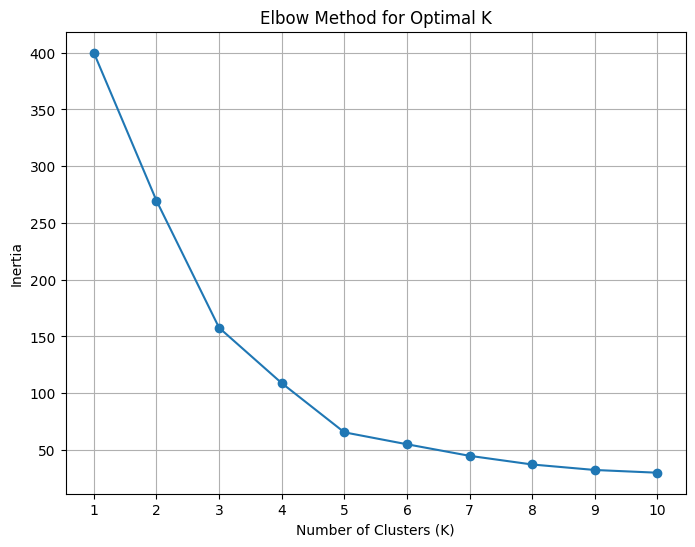

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Visualize Clusters :**

In [ ]:
from sklearn.cluster import KMeans

optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.predict(X_scaled)
cluster_centroids = kmeans.cluster_centers_

print("Cluster Labels:")
print(cluster_labels[:10])
print("\nCluster Centroids:")
print(cluster_centroids)

Cluster Labels:
[4 5 4 5 4 5 4 5 4 5]

Cluster Centroids:
[[ 1.81769762  1.26275949]
 [ 0.1206509  -0.15673077]
 [-0.49804891  0.06175337]
 [ 0.7489536  -1.45651437]
 [-1.32954532 -1.16358805]
 [-1.35366972  1.15873115]
 [ 0.66703804  1.23036618]
 [ 1.87564575 -1.09476801]]


The code in the cell above performs K-Means clustering using the optimal number of clusters determined from the Elbow Method (which was visually chosen as 8 in this case).

1.  `optimal_k = 8`: This line sets the variable `optimal_k` to 8, based on the analysis of the elbow plot.
2.  `kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)`: This creates a KMeans model instance with the specified number of clusters (`optimal_k`), a `random_state` for reproducibility, and `n_init=10` to run the algorithm multiple times and select the best result.
3.  `kmeans.fit(X_scaled)`: This fits the KMeans model to the scaled data `X_scaled`. The algorithm finds the cluster centroids and assigns each data point to a cluster.
4.  `cluster_labels = kmeans.predict(X_scaled)`: This line predicts the cluster label for each data point in `X_scaled` based on the fitted KMeans model. The results are stored in the `cluster_labels` array.
5.  `cluster_centroids = kmeans.cluster_centers_`: This line retrieves the coordinates of the cluster centroids found by the KMeans algorithm and stores them in the `cluster_centroids` array.
6.  The `print` statements display the first 10 cluster labels and the coordinates of all the cluster centroids.

**Analyze Intra-cluster and Inter-cluster Distances (Conceptual) :**

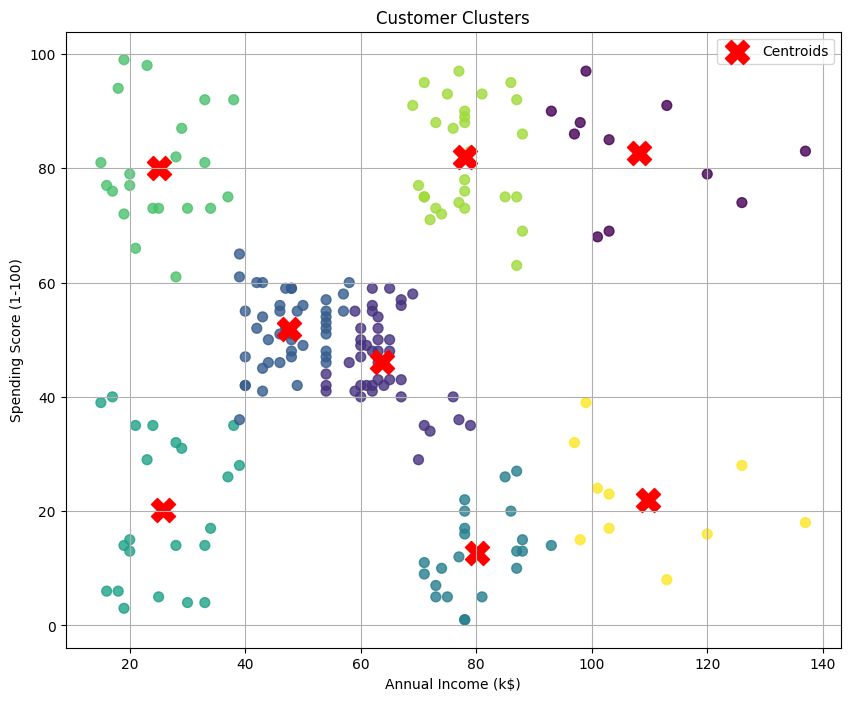

In [ ]:
import matplotlib.pyplot as plt

n_features = X.shape[1]

if n_features == 2 or n_features == 3:
    # Inverse transform centroids if scaled
    if 'scaler' in locals():
        cluster_centroids_original_scale = scaler.inverse_transform(cluster_centroids)
    else:
        cluster_centroids_original_scale = cluster_centroids

    plt.figure(figsize=(10, 8))
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
    plt.scatter(cluster_centroids_original_scale[:, 0], cluster_centroids_original_scale[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title('Customer Clusters')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)
    plt.show()
elif n_features > 3:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    cluster_centroids_pca = pca.transform(cluster_centroids)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
    plt.scatter(cluster_centroids_pca[:, 0], cluster_centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title('Customer Clusters (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()